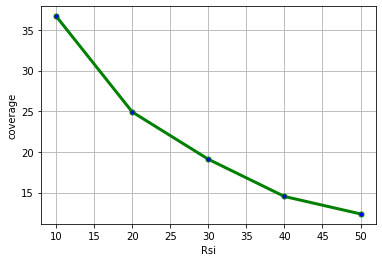

In [1]:
import numpy as np
import pandas as pd
import random
import Module as external
import copy
import matplotlib.pyplot as plt
tar = 70 #int(input("Enter the number of targets:- "))
sen =  140 #int(input("Enter the number of sensors:- "))
grid_size = 150
temp_graph_list = list()
temp_Rsi_list = list()
for i in range(10,51,10):
    Rsi = i
    T = np.random.randint(0, grid_size+1, size=(tar, 2))
    S = np.random.randint(0, grid_size+1, size=(sen, 2))
    sink_node = np.random.randint(0, grid_size+1, size=(1, 2))
    dist = external.distTargetSensor(S,T)
    cover_targets= (dist<=Rsi).astype(int)
    not_covered = list()
    ST_map = dict()
    count_map = dict()
    temp1 = np.where(~cover_targets.any(axis=1))[0]
    not_covered = temp1.tolist()
    n = len(cover_targets)
    m = len(cover_targets[0])
    for x in range(n):
        sensors_covering_target = list()
        count = 0
        for y in range(m):
            if(cover_targets[x][y] == 1):
                count = count+1
                count_map[x] = count
                sensors_covering_target.append(y)
                ST_map[x] = sensors_covering_target
    temp_tuple = copy.deepcopy(ST_map)
    min_val = min([len(ST_map[ele]) for ele in ST_map])
    T_critical = []
    for ele in ST_map:
        if len(ST_map[ele]) == min_val:
            T_critical.append(ele)
    S_critical_list=[ST_map[k] for k in T_critical if k in ST_map]
    first_tuple_list = [tuple(lst) for lst in S_critical_list]
    S_critical = set(first_tuple_list)
    S_all = ST_map.keys()
    NC_Target = S_all - T_critical
    SN_critical = [ST_map[k] for k in NC_Target if k in ST_map]
    sensor_map = {}
    for sm in range(m):
        count = 0
        for smg in range(n):
            if(cover_targets[smg][sm] == 1):
                count = count+1
                sensor_map[sm] = count
    target_Set = set()
    sensor_Set = set()
    reserve_Set = set()
    continue_loop = len(T_critical)
    temp_dict = dict()
    while(continue_loop):
        for i in S_critical:
                temp_dict = {k: sensor_map[k] for k in sensor_map.keys() & i}
                if(len(T_critical)==1):
                    temp_critical=max(temp_dict, key= lambda x: temp_dict[x])
                    sensor_Set.add(temp_critical)
                else:
                    temp_dict = {k: sensor_map[k] for k in sensor_map.keys() & i}
                    temp_critical=max(temp_dict, key= lambda x: temp_dict[x])
                    sensor_Set.add(temp_critical)
                    
        for i in S_critical:
            for j in i:
                reserve_Set.add(j)
        reserve_Set=reserve_Set.difference(sensor_Set)
        continue_loop = continue_loop-1
    for key,value in temp_tuple.items():
        for j in value:
            for k in sensor_Set:
                if(k==j):
                    target_Set.add(key)
    remaining_target = tar- ((len(target_Set)) - (len(not_covered)))
    temp1= len(sensor_Set)
    temp2 = len(reserve_Set)
    remaining_sensors = sen -temp1 -temp2
    total_target = set()
    for i in temp_tuple.keys():
        total_target.add(i)
    non_critical_targets = (total_target).difference(target_Set)
    SN = [temp_tuple[k] for k in non_critical_targets if k in temp_tuple]
    continue_loop = len(non_critical_targets)
    temp_dict = dict()
    while(continue_loop):
        for i in SN:
            temp_dict = {k: sensor_map[k] for k in sensor_map.keys() & i}
            temp_noncritical=max(temp_dict, key= lambda x: temp_dict[x])
            sensor_Set.add(temp_noncritical)
                    
        for i in SN:
            for j in i:
                reserve_Set.add(j)
        reserve_Set=reserve_Set.difference(sensor_Set)
        continue_loop = continue_loop-1
    for key,value in temp_tuple.items():
        for j in value:
            for k in sensor_Set:
                if(k==j):
                    target_Set.add(key)
    temp = [t for t in sensor_Set]
    gra = len(temp)
    #print(gra)
    temp_graph_list.append(gra)
    temp_Rsi_list.append(Rsi)
df = pd.read_excel('rrr.xlsx')
df = df.transpose()
tf = pd.DataFrame(temp_graph_list)
tf =  tf.transpose()
df = df.append(tf)
l=[]
for i in df:
    temp=df[i].mean()
    l.append(temp)
plt.plot(temp_Rsi_list,l, color='green', linestyle='-', linewidth = 3,marker='o', markerfacecolor='blue', markersize=5)
plt.xlabel('Rsi')
plt.ylabel('coverage')
plt.grid(True)
plt.show()

In [2]:
df

,0,1,2,3,4
Unnamed: 0,35,27,21,8,15
Unnamed: 1,37,28,18,17,12
Unnamed: 2,35,26,17,19,12
Unnamed: 3,32,24,19,13,13
Unnamed: 4,42,29,16,10,11
Unnamed: 5,35,27,18,19,12
Unnamed: 6,41,23,17,16,18
Unnamed: 7,39,24,19,12,13
Unnamed: 8,38,28,19,16,10
Unnamed: 9,34,25,18,13,15


In [3]:
ST_map

{0: [4,
  6,
  9,
  22,
  23,
  24,
  26,
  28,
  32,
  34,
  35,
  42,
  43,
  48,
  49,
  51,
  52,
  60,
  61,
  64,
  66,
  68,
  73,
  76,
  79,
  82,
  86,
  91,
  95,
  96,
  99,
  101,
  103,
  112,
  114,
  116,
  125,
  129,
  130,
  131,
  136,
  139],
 1: [3,
  4,
  6,
  7,
  8,
  9,
  16,
  22,
  24,
  26,
  28,
  42,
  48,
  49,
  52,
  64,
  66,
  68,
  69,
  76,
  80,
  82,
  86,
  91,
  95,
  99,
  101,
  103,
  114,
  116,
  129,
  130,
  131],
 2: [4,
  9,
  14,
  16,
  18,
  20,
  23,
  24,
  28,
  32,
  33,
  49,
  50,
  52,
  54,
  59,
  67,
  70,
  72,
  73,
  75,
  76,
  83,
  84,
  86,
  90,
  91,
  92,
  93,
  96,
  98,
  129,
  130,
  135,
  136,
  138],
 3: [4,
  9,
  14,
  16,
  23,
  24,
  28,
  32,
  33,
  49,
  50,
  52,
  54,
  67,
  70,
  73,
  75,
  76,
  83,
  84,
  86,
  90,
  91,
  92,
  93,
  96,
  98,
  99,
  129,
  130,
  135,
  136,
  138],
 4: [5,
  6,
  12,
  17,
  26,
  27,
  29,
  31,
  36,
  37,
  38,
  40,
  44,
  46,
  47,
  48,
  56,
  

In [ ]:
reserve_Set

In [5]:
len(reserve_Set)

129

In [6]:
len(sensor_Set)

11